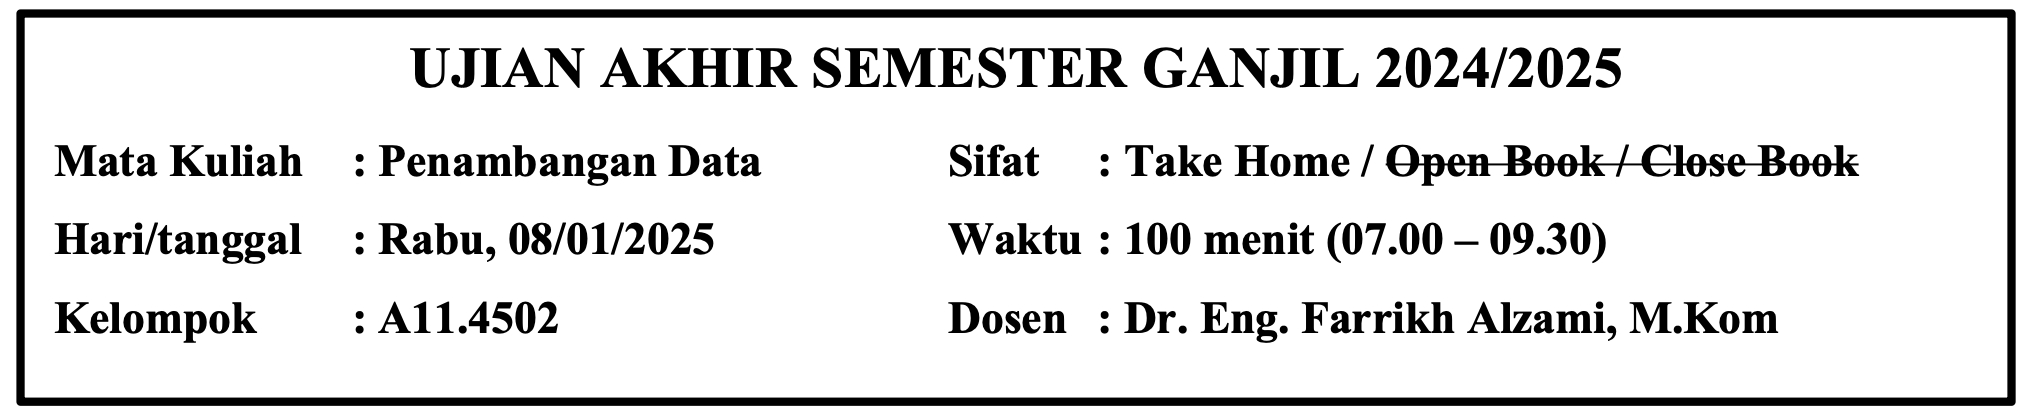

## **Estimasi Nilai MPG pada Dataset dengan Missing Values menggunakan Regresi Linear**

Dataset dataset Auto MPG dengan url : (https://archive.ics.uci.edu/dataset/9/auto+mpg)

Dataset tersebut memiliki 398 records dengan 7 fitur. TARGETnya adalah: mpg.

## Load google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load library

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load dataset sehingga bisa diolah datanya, Masukkan nama fitur ke dataset (nilai 10)

In [ ]:
folder_name = "/content/drive/My Drive/Perkuliahan/Semester 5/Data Mining/UAS"
import sys
sys.path.append(f'{folder_name}')

df =pd.read_csv(f'/content/drive/My Drive/Perkuliahan/Semester 5/Data Mining/UAS/auto_mpg.csv', sep=',', skipinitialspace=True, na_values="?")
df.head(10)


,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,140.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   displacement  398 non-null    float64 
 1   mpg           398 non-null    int64   
 2   cylinders     398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car_name      0 non-null      category
dtypes: category(1), float64(4), int64(4)
memory usage: 25.5 KB


## 2. Cek data yang kosong, dan rubah data yang kosong menjadi NaN (nilai 5)

In [ ]:
df.isnull().sum()

,0
displacement,0
mpg,0
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [ ]:
# Hitung persentase missing value per kolom
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
displacement    0.000000
mpg             0.000000
cylinders       0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
car_name        0.000000
dtype: float64


In [ ]:
# Hapus baris dengan missing values
df = df.dropna()

# Hapus kolom dengan missing values
df = df.dropna(axis=1)


In [ ]:
df.isnull().sum()

,0
displacement,0
mpg,0
cylinders,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


## 3. Drop data duplikat, Drop fitur yang bernilai konstan (nilai 5)

In [ ]:
# Menampilkan jumlah data pada dataset
print(f"Jumlah baris: {df.shape[0]}")

Jumlah baris: 398


In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


In [ ]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Menampilkan jumlah baris setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")

Jumlah baris setelah menghapus duplikat: 398


In [ ]:
# Menampilkan fitur dan jumlah fitur pada dataset
print(f"Jumlah fitur: {len(df.columns)}")
print(df.columns)

Jumlah fitur: 9
Index(['displacement', 'mpg', 'cylinders', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


In [ ]:
# Menampilkan fitur yang memiliki nilai konstan (hanya satu nilai unik)
constant_features = df.columns[df.nunique() == 1]

# Mengecek jika ada fitur konstan
if len(constant_features) == 0:
    print("Tidak ada fitur yang bernilai konstan.")
else:
    print(f"Jumlah fitur yang bernilai konstan: {len(constant_features)}")
    print("\nContoh fitur yang bernilai konstan:")
    print(constant_features)


Tidak ada fitur yang bernilai konstan.


In [ ]:
# Menampilkan fitur yang memiliki nilai konstan
constant_features = df.columns[df.nunique() == 1]
print(f"Jumlah fitur konstan: {len(constant_features)}")

Jumlah fitur konstan: 0


In [ ]:
# Menghapus fitur konstan
df = df.drop(columns=constant_features)
print(f"Jumlah fitur setelah penghapusan: {df.shape[1]}")


Jumlah fitur setelah penghapusan: 9


## 4. Visualisasikan semua fitur dengan barchart (nilai 10)

In [ ]:
# Memeriksa fitur kategorikal (tipe object)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Fitur kategorikal:")
print(categorical_cols)

# Memeriksa fitur numerik (tipe int dan float)
numeric_cols = df.select_dtypes(include=['number']).columns
print("\nFitur numerik:")
print(numeric_cols)


Fitur kategorikal:
Index([], dtype='object')

Fitur numerik:
Index(['displacement', 'mpg', 'cylinders', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


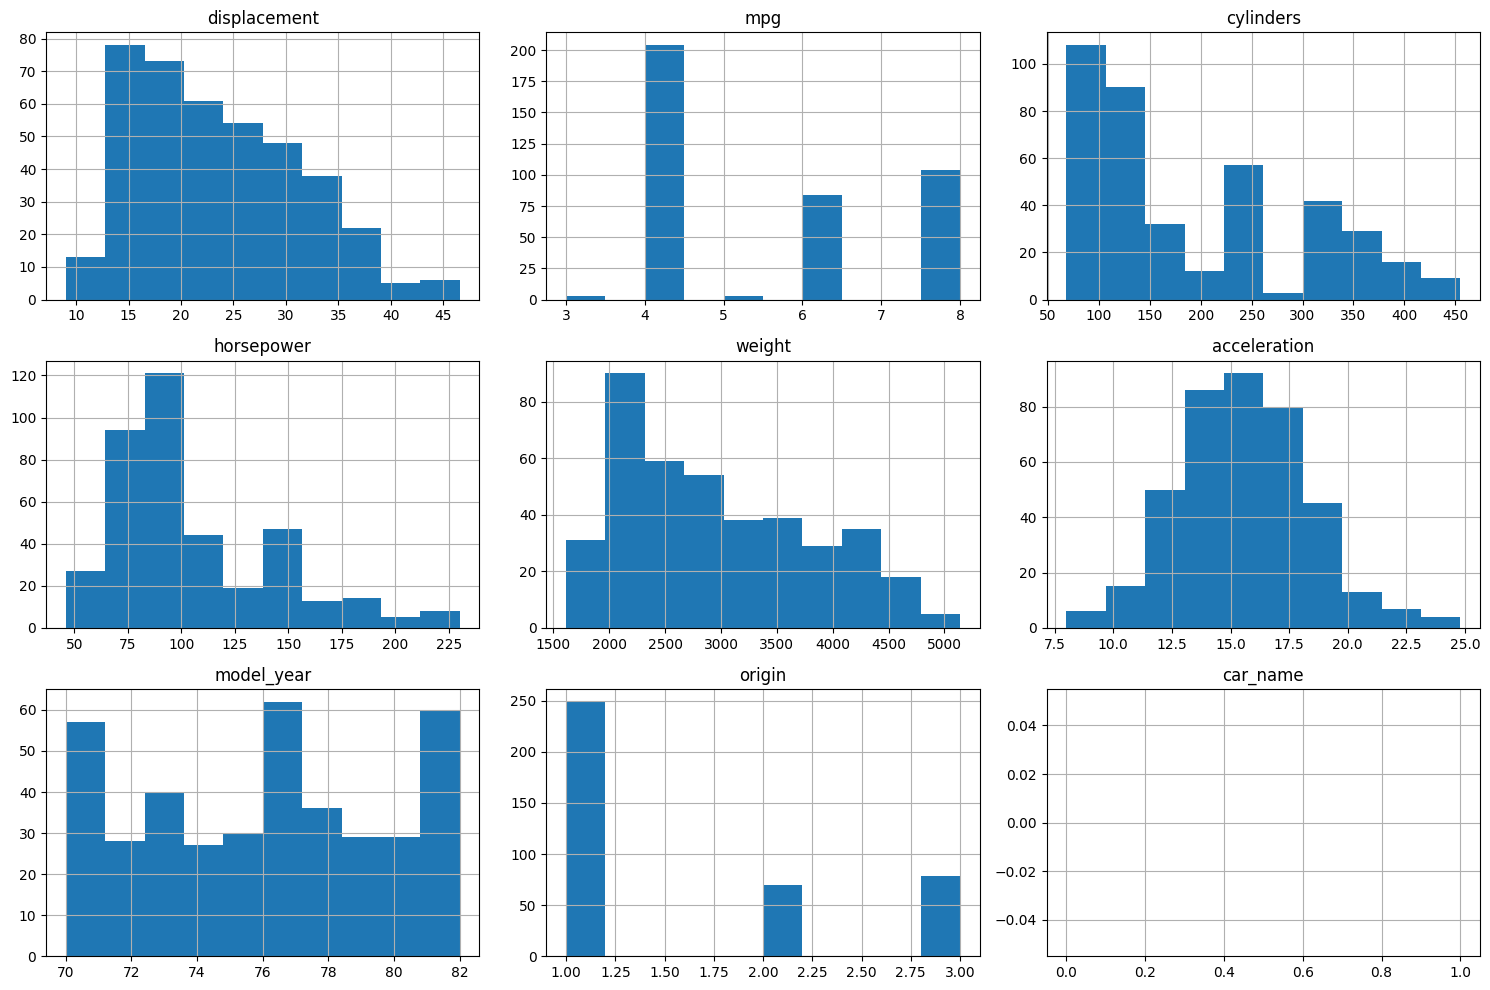

In [ ]:
# Konversi kolom ke tipe numerik jika memungkinkan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot histogram untuk kolom numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Statistik deskriptif untuk variabel kategorikal
categorical_features = df.select_dtypes(include='category').columns.tolist()
categorical_features

['car_name']

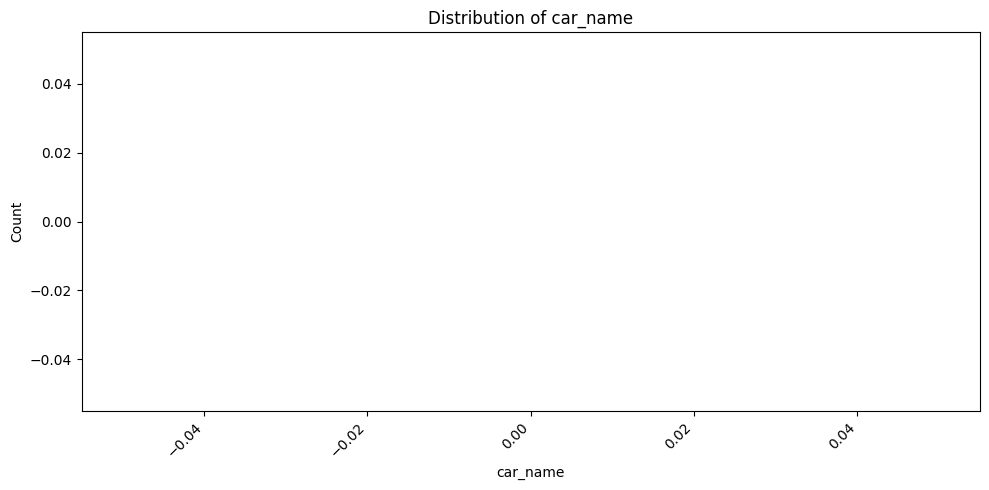

In [ ]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['category']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 5))

    value_counts = df[feature].value_counts()
    x_labels = value_counts.index

    plt.bar(x_labels, value_counts.values)

    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 5. Konversikan nilai kategorikal menjadi ordinal (nilai 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

## 6. Cek korelasi (nilai 5)

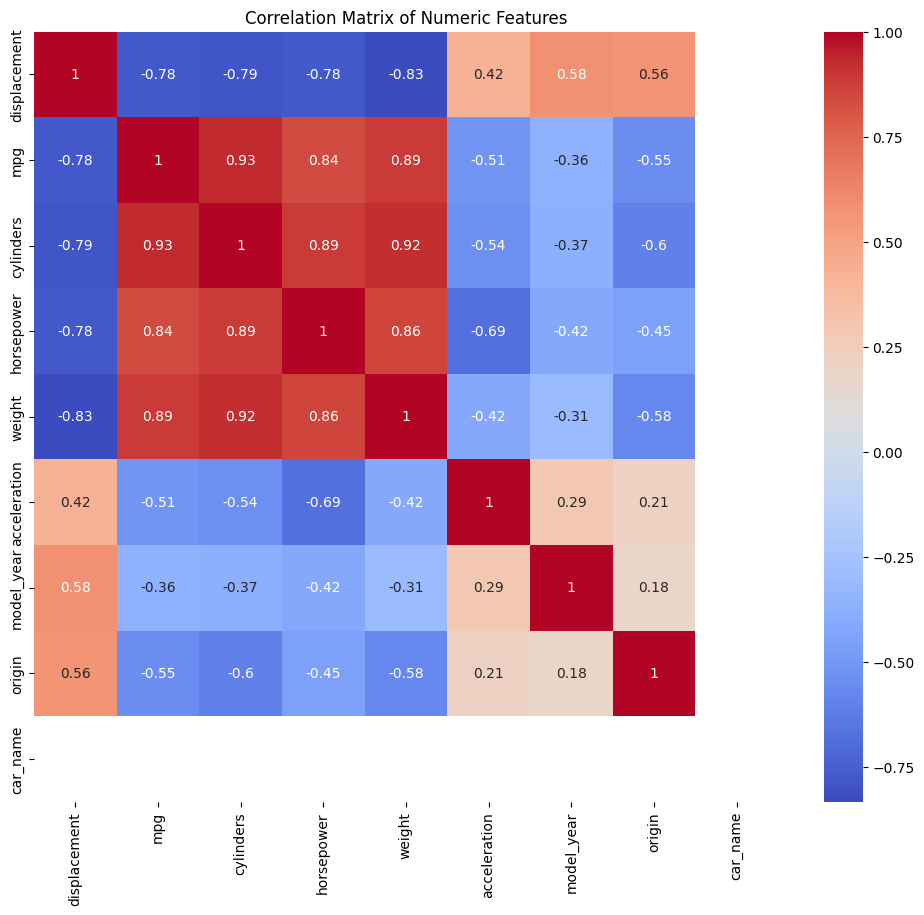

In [ ]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 7. Bagi data menjadi training dan testing (nilai 5)

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop('mpg', axis=1)
y = df['mpg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## 8. Gunakan Multiple Linear Regresion dan baca rumus yang dihasilkan (nilai 15)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = df.drop(['mpg'], axis=1)
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

imputer = SimpleImputer(strategy='mean')


x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.8973961877565774


In [ ]:
x

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,307.0,130.0,3504,12.0,70,1,0
1,15.0,350.0,165.0,3693,11.5,70,1,0
2,18.0,318.0,150.0,3436,11.0,70,1,0
3,16.0,304.0,140.0,3433,12.0,70,1,0
4,17.0,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,82,1,0
394,44.0,97.0,52.0,2130,24.6,82,2,0
395,32.0,135.0,84.0,2295,11.6,82,1,0
396,28.0,120.0,79.0,2625,18.6,82,1,0


In [ ]:
lr.coef_

array([-0.01631992,  0.01186507, -0.00237769,  0.00041979, -0.03405423,
        0.00311599,  0.0791403 ,  0.        ])

In [ ]:
lr.intercept_

2.735460988265915

## 9. Jelaskan hasil dari R2, RMSE, MSE, MAPE dari Multiple Linear Regresion (nilai 10)

In [ ]:
# Menghitung R² untuk data latih dan data uji
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Menampilkan hasil R²
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train, r2_test))

R2 train data: 0.874, R2 test data: 0.897


In [ ]:
# Menghitung RMSE untuk data latih dan data uji
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Menampilkan hasil RMSE
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train, rmse_test))


RMSE train data: 0.599, RMSE test data: 0.576


In [ ]:
# Menghitung MSE untuk data latih dan data uji
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Menampilkan hasil MSE
print('MSE train data: %.3f, MSE test data: %.3f' % (mse_train, mse_test))

MSE train data: 0.359, MSE test data: 0.332


In [ ]:
# Menghitung MAPE
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Menampilkan hasil MAPE
print('MAPE train data: %.3f, MAPE test data: %.3f' % (mape_train, mape_test))

MAPE train data: 8.431, MAPE test data: 8.322


## 10. Sekarang, gunakan Random Forest Regressor (number estimator 100), dan jelaskan hasil dari R2, RMSE, MSE, MAPE dari Random Forest (nilai 20)

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'friedman_mse',
                              random_state = 42,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

In [ ]:
# Menghitung R2 untuk data train dan test
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

R2 train data: 0.989, R2 test data: 0.974


In [ ]:
# Menghitung MSE untuk data train dan test
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))

MSE train data: 0.031, MSE test data: 0.085


In [ ]:
# Menghitung RMSE untuk data train dan test
train_rmse = np.sqrt(mean_squared_error(y_train, forest_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, forest_test_pred))

print('RMSE train data: %.3f, RMSE test data: %.3f' % (train_rmse, test_rmse))


RMSE train data: 0.177, RMSE test data: 0.292


In [ ]:
# Menghitung MAPE untuk data train dan test
train_mape = np.mean(np.abs((y_train - forest_train_pred) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - forest_test_pred) / y_test)) * 100

print('MAPE train data: %.3f, MAPE test data: %.3f' % (train_mape, test_mape))


MAPE train data: 0.943, MAPE test data: 1.023


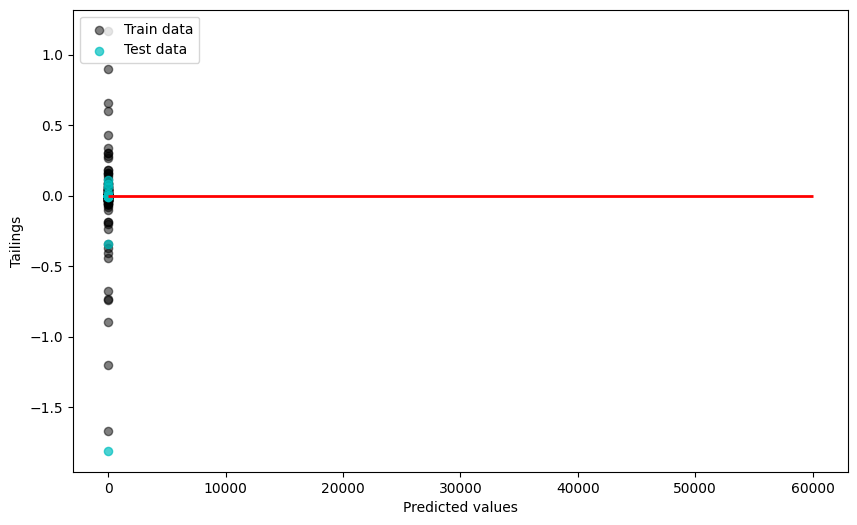

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

## 11. Jelaskan, metode mana yang terbaik dan apa penyebabnya menjadi demikian (nilai 10)

*Random Forest Regressor* lebih baik daripada *Multiple Linear Regression* berdasarkan hasil perhitungan berikut:

R2: Random Forest memiliki R2 yang lebih tinggi pada data uji (0.974 vs 0.897).
RMSE: Random Forest lebih akurat dengan RMSE lebih rendah (0.292 vs 0.576).
MSE: Random Forest memiliki MSE lebih rendah (0.085 vs 0.332).
MAPE: Random Forest juga memiliki MAPE lebih rendah (1.023% vs 8.322%).

**Penyebab** : Random Forest lebih baik karena dapat menangani hubungan non-linier dan kompleks antar fitur, sedangkan Multiple Linear Regression hanya menangani hubungan linier.